In [1]:
import pickle 
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import gzip
import numpy as np
from keras.models import load_model

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Using TensorFlow backend.


Files in 'C:\\Users\\Ieremie\\Documents\\Individual project\\secondSemester\\Personal-Project\\kfold': ['.ipynb_checkpoints', 'all_dataset_window19Middle.npy', 'all_dataset_window19Middle.npy.gz', 'all_dataset_window19MiddleQ2.npy.gz', 'all_dataset_window19MiddleQ3.npy.gz', 'all_dataset_window9LeftSideQ2.npy.gz', 'all_dataset_window9LeftSideQ3.npy.gz', 'all_dataset_window9LeftSideQ8.npy.gz', 'all_dataset_window9RightSideQ2.npy.gz', 'all_dataset_window9RightSideQ3.npy.gz', 'all_dataset_window9RightSideQ8.npy.gz', 'bigModelHistograms.ipynb', 'boxPlots.ipynb', 'cb513_window19Q2.npy.gz', 'cb513_window19Q3.npy.gz', 'cb513_window19Q8.npy.gz', 'kfold-1hot', 'kfold-1hotQ2', 'kfold-1hotQ3', 'kfold-1hotQ8', 'kfold-pssm', 'kfold-pssmQ2', 'kfold-pssmQ3', 'kfold-pssmQ8', 'kfold.ipynb', 'left-sideQ2', 'left-sideQ3', 'left-sideQ8', 'right-sideQ2', 'right-sideQ3']


In [2]:
f = gzip.GzipFile('cb513_window19Q8.npy.gz', "r")
testset = np.load(f)
print(testset.shape)

(80119, 19, 50)


In [3]:
def get_test_accuracy(path):
    
    test = []
    classSize = 8
    for i in range(1,11):    
        m =  load_model( path + "/model_kfold" + str(i) + ".h5")
        print(i)
        res = m.evaluate(testset[:,:,21+classSize:], testset[:, 0, 21 : (21+classSize)])[1]
        test.append(res)
        
    return test    

In [4]:
import seaborn as sns


left = []
right = []

for i in range(1,11):
    m1s = pickle.load( open( "right-sideQ/model_scores_kfold" + str(i), "rb" ) )
    left.append(m1s[1])
    m2s = pickle.load( open( "left-sideQ8/model_scores_kfold" + str(i), "rb" ) )
    right.append(m2s[1])

fig = plt.figure()
fig.set_size_inches(7,10)
gs = gridspec.GridSpec(1, 2, wspace=0.4, width_ratios=[1,1])
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

ax0.set_ylabel("Q8 Accuracy", fontsize=18, labelpad=25, weight='bold')
ax0.set_xlabel("Right side",  fontsize=16, weight='bold')
ax1.set_xlabel("Left ",  fontsize=16, weight='bold')

ax0.tick_params(labelsize=13)
ax1.tick_params(labelsize=13)

sns.set(style="darkgrid")
sns.boxplot(y = left, orient="v",linewidth=4,palette="Blues", width=0.4, ax = ax0)
sns.boxplot(y = right, orient="v",linewidth=4,palette="Blues", width=0.4, ax = ax1)

#sns.swarmplot(y = oneHotQ8, color="g", ax = ax0)


FileNotFoundError: [Errno 2] No such file or directory: 'right-sideQ/model_scores_kfold1'

In [ ]:
hotT  = "kfold-1hotQ8"
pssmT = "kfold-pssmQ8" 
testH = get_test_accuracy(hotT)
testP = get_test_accuracy(pssmT)

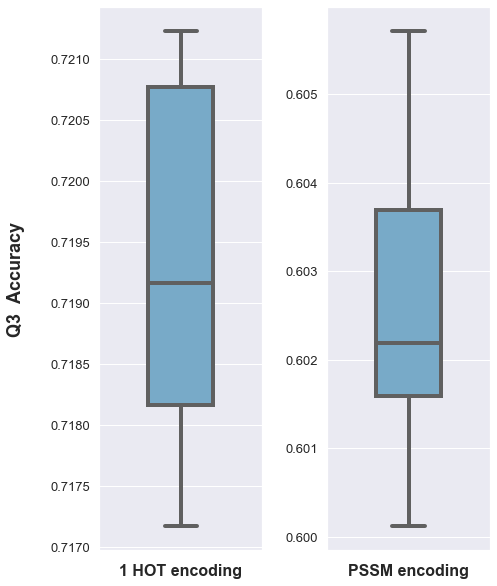

In [35]:
import seaborn as sns


hot = []
pssm = []

for i in range(1,11):
    
    m1s = pickle.load( open( "kfold-1hotQ8/model_scores_kfold" + str(i), "rb" ) )
    hot.append(m1s[1])
    m2s = pickle.load( open( "kfold-pssmQ8/model_scores_kfold" + str(i), "rb" ) )
    pssm.append(m2s[1])    

fig = plt.figure()
fig.set_size_inches(7,10)
gs = gridspec.GridSpec(1, 2, wspace=0.4, width_ratios=[1,1])
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

ax0.tick_params(labelsize=13)
ax1.tick_params(labelsize=13)

ax0.set_ylabel("Q3  Accuracy", fontsize=18, labelpad=25, weight='bold')
ax0.set_xlabel("1 HOT encoding",  fontsize=16, weight='bold')

ax1.set_xlabel("PSSM encoding",  fontsize=16, weight='bold')



sns.set(style="darkgrid")
sns.boxplot(y = hot, orient="v",linewidth=4,palette="Blues", width=0.4, ax = ax0)
sns.boxplot(y = pssm, orient="v",linewidth=4,palette="Blues", width=0.4, ax = ax1)

#ax0.plot(0.01, np.average(testP) ,marker='v', color='r', ls='-',markersize=10)


[0.6673448085784912, 0.6732610464096069, 0.6741971373558044, 0.6759195923805237, 0.6705525517463684, 0.6726993322372437, 0.6712515354156494, 0.6752081513404846, 0.6722500324249268, 0.6656598448753357]
